<a href="https://colab.research.google.com/github/kabuck/co-op-code/blob/Google-Colab/PyCaret_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret --user

In [ ]:
!pip install awscli

     |████████████████████████████████| 3.6MB 12.5MB/s 
     |████████████████████████████████| 7.3MB 55.9MB/s 
     |████████████████████████████████| 552kB 46.1MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 143kB 64.6MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [ ]:
import pycaret as pc
from pycaret.datasets import *

In [ ]:
#Import Libraries
import pandas as pd

#Import/Download Data
from google.colab import files
uploaded = files.upload()
import io



Saving ds1.csv to ds1.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ds1.csv']))

In [ ]:
print(df.shape)
df.head(5)

#Format the data

headers = ["Alloy No.", "Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness"]
df.columns = headers #Changes the headers
df.drop([0,0], inplace=True) #removes the extra headers
print(df.head(5))
df = df[["Al", "Co", 'Cr', 'Cu', "Fe", "Ni", "Hardness"]].astype("float")
df.info()
print(df.min)
df.head(5)


#Add categorical data: hard or soft
'''
Hard = 2
Soft = 1
Average = 0
'''

df.loc[(df["Hardness"] >= 700), "ID"] = 2
df.loc[(df["Hardness"] <= 550), "ID"] = 1
df.loc[((df["Hardness"] > 550) & (df["Hardness"] < 700)), "ID"] = 0

print(df["ID"].value_counts())

df = df[["Al", "Co", 'Cr', 'Cu', "Fe", "Ni", "ID"]].astype("float")
print(df.head(5))

(156, 8)
   Alloy No.    Al    Co    Cr    Cu    Fe    Ni  Hardness
1        1.0  18.2   9.1  18.2  18.2  18.2  18.2     473.0
2        2.0  18.2  18.2   9.1  18.2  18.2  18.2     367.0
3        3.0  18.2  18.2  18.2  18.2   9.1  18.2     418.0
4        4.0  18.2  18.2  18.2  18.2  18.2   9.1     423.0
5        5.0   5.3  21.1  21.1     0  26.3  26.3     168.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 155
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Al        155 non-null    float64
 1   Co        155 non-null    float64
 2   Cr        155 non-null    float64
 3   Cu        155 non-null    float64
 4   Fe        155 non-null    float64
 5   Ni        155 non-null    float64
 6   Hardness  155 non-null    float64
dtypes: float64(7)
memory usage: 9.7 KB
<bound method DataFrame.min of        Al    Co    Cr    Cu    Fe    Ni  Hardness
1    18.2   9.1  18.2  18.2  18.2  18.2     473.0
2    18.2  

In [ ]:
from pycaret.classification import *
exp_clf = setup(df, target = "ID")

,Description,Value
0,session_id,597
1,Target,ID
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(155, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#compare models
best1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8727,0.6101,0.6792,0.8198,0.8459,0.6614,0.6800,0.018
lda,Linear Discriminant Analysis,0.8545,0.6546,0.7708,0.8382,0.8421,0.6550,0.6834,0.017
lightgbm,Light Gradient Boosting Machine,0.8536,0.6325,0.7500,0.8232,0.8376,0.5918,0.6209,0.045
knn,K Neighbors Classifier,0.8445,0.6472,0.7000,0.8065,0.8301,0.5680,0.5930,0.354
et,Extra Trees Classifier,0.8355,0.6372,0.6667,0.8008,0.8196,0.5548,0.5752,0.457
nb,Naive Bayes,0.8264,0.6337,0.7083,0.8140,0.8189,0.5558,0.5859,0.019
rf,Random Forest Classifier,0.8173,0.6300,0.6458,0.7746,0.7989,0.5105,0.5360,0.472
gbc,Gradient Boosting Classifier,0.8164,0.5904,0.6917,0.7866,0.8087,0.5074,0.5298,0.217
svm,SVM - Linear Kernel,0.8000,0.0000,0.6792,0.8030,0.7757,0.5458,0.6035,0.064
dt,Decision Tree Classifier,0.7891,0.5511,0.7167,0.8050,0.7975,0.4930,0.5241,0.017


In [ ]:
#return best model based on AUC
best2 = compare_models(sort= "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8545,0.6546,0.7708,0.8382,0.8421,0.6550,0.6834,0.018
knn,K Neighbors Classifier,0.8445,0.6472,0.7000,0.8065,0.8301,0.5680,0.5930,0.356
et,Extra Trees Classifier,0.8355,0.6372,0.6667,0.8008,0.8196,0.5548,0.5752,0.460
nb,Naive Bayes,0.8264,0.6337,0.7083,0.8140,0.8189,0.5558,0.5859,0.017
lightgbm,Light Gradient Boosting Machine,0.8536,0.6325,0.7500,0.8232,0.8376,0.5918,0.6209,0.045
rf,Random Forest Classifier,0.8173,0.6300,0.6458,0.7746,0.7989,0.5105,0.5360,0.474
qda,Quadratic Discriminant Analysis,0.8727,0.6101,0.6792,0.8198,0.8459,0.6614,0.6800,0.019
gbc,Gradient Boosting Classifier,0.8164,0.5904,0.6917,0.7866,0.8087,0.5074,0.5298,0.221
ada,Ada Boost Classifier,0.7445,0.5516,0.6917,0.7935,0.7579,0.4478,0.4636,0.098
dt,Decision Tree Classifier,0.7891,0.5511,0.7167,0.8050,0.7975,0.4930,0.5241,0.018


In [ ]:
#Return top 3 models
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8727,0.6101,0.6792,0.8198,0.8459,0.6614,0.6800,0.020
lda,Linear Discriminant Analysis,0.8545,0.6546,0.7708,0.8382,0.8421,0.6550,0.6834,0.017
lightgbm,Light Gradient Boosting Machine,0.8536,0.6325,0.7500,0.8232,0.8376,0.5918,0.6209,0.046
knn,K Neighbors Classifier,0.8445,0.6472,0.7000,0.8065,0.8301,0.5680,0.5930,0.355
et,Extra Trees Classifier,0.8355,0.6372,0.6667,0.8008,0.8196,0.5548,0.5752,0.457
nb,Naive Bayes,0.8264,0.6337,0.7083,0.8140,0.8189,0.5558,0.5859,0.018
rf,Random Forest Classifier,0.8173,0.6300,0.6458,0.7746,0.7989,0.5105,0.5360,0.469
gbc,Gradient Boosting Classifier,0.8164,0.5904,0.6917,0.7866,0.8087,0.5074,0.5298,0.218
svm,SVM - Linear Kernel,0.8000,0.0000,0.6792,0.8030,0.7757,0.5458,0.6035,0.064
dt,Decision Tree Classifier,0.7891,0.5511,0.7167,0.8050,0.7975,0.4930,0.5241,0.019


In [ ]:
#KNN Classifier Model

#train knn model using 5 fold CV
knn = create_model('knn', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,0.9296,0.9125,0.9091,0.9091,0.7822,0.7822
1,0.9091,0.9962,0.8333,0.9192,0.8966,0.7609,0.7874
2,0.7727,0.8788,0.4167,0.6730,0.7169,0.3452,0.3767
3,0.7143,0.8403,0.3125,0.6723,0.6926,0.2075,0.2122
4,0.9048,1.0000,0.5833,0.8677,0.8804,0.7021,0.7350
Mean,0.8420,0.9290,0.6117,0.8083,0.8191,0.5596,0.5787
SD,0.0825,0.0632,0.2315,0.1121,0.0941,0.2368,0.2386


In [ ]:
#Tune KNN Model

#Tune KNN hyperparameters with increased n_iter
tuned_knn = tune_model(knn, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.0000,0.8750,0.8750,0.8750,0.5417,0.5417
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8182,0.8283,0.6667,0.6727,0.7374,0.4500,0.5582
3,0.9091,0.9899,0.8333,0.9545,0.9091,0.7925,0.8077
4,0.9091,0.9899,0.6667,0.8485,0.8727,0.7843,0.8006
5,0.7273,0.7525,0.3333,0.5818,0.6465,0.1538,0.1861
6,0.7273,0.9202,0.4583,0.7879,0.7515,0.4310,0.4403
7,0.7273,0.4545,0.3333,0.5818,0.6465,0.1538,0.1861
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
#Tune multiple models dynamically

top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,0.0000,1.0000,0.8889,0.9412,0.7442,0.7698
1,0.8182,0.8889,0.6667,0.6727,0.7374,0.4500,0.5582
2,0.8182,0.9596,0.7917,0.8636,0.8303,0.6271,0.6414
3,0.9091,0.9798,0.6667,0.8485,0.8727,0.7843,0.8006
4,0.9091,0.9495,0.8333,0.9192,0.8966,0.7609,0.7874
5,0.8182,0.8586,0.6667,0.6727,0.7374,0.4500,0.5582
6,0.7273,0.9202,0.6250,0.7576,0.7242,0.4500,0.4755
7,0.7273,0.5758,0.3333,0.5818,0.6465,0.1538,0.1861
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9000,0.0000,1.0000,0.8889,0.9412,0.6154,0.6667


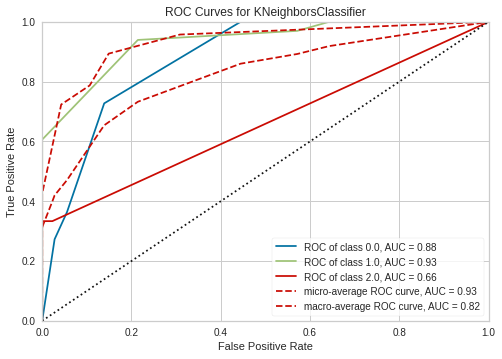

In [ ]:
plot_model(knn)

In [ ]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#Predict Model
knn_pred_holdout = predict_model(knn)
knn_pred_new = predict_model(knn, data = df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7872,0.9032,0.5556,0.7816,0.7576,0.4268,0.4651


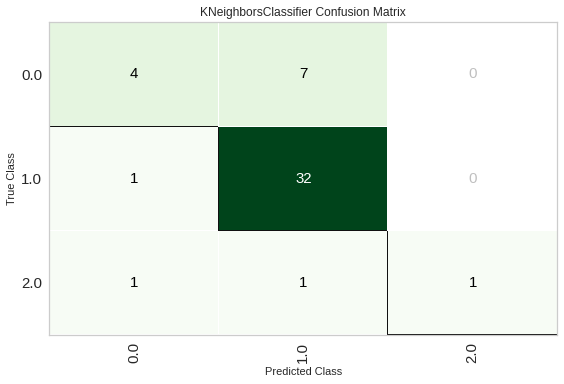

In [ ]:
#Confusion Matrix
plot_model(knn, "confusion_matrix")

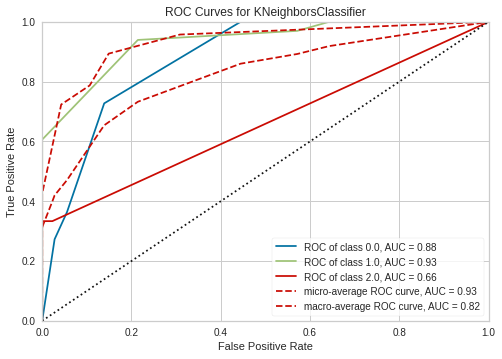

In [ ]:
#Area Under the Curve
plot_model(knn, "auc")

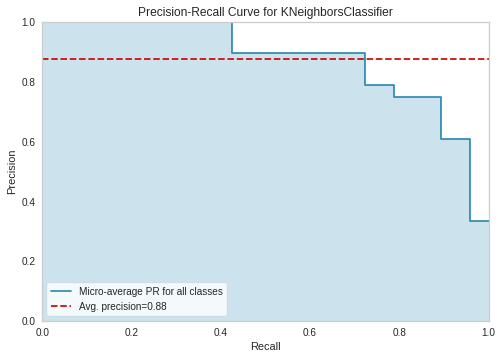

In [ ]:
#Precision Recall Curve
plot_model(knn, "pr")

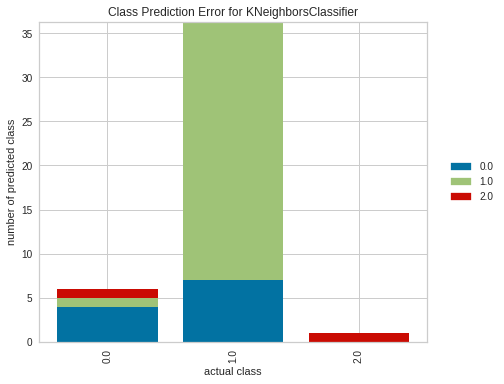

In [ ]:
#Class prediction error
plot_model(knn, "error")

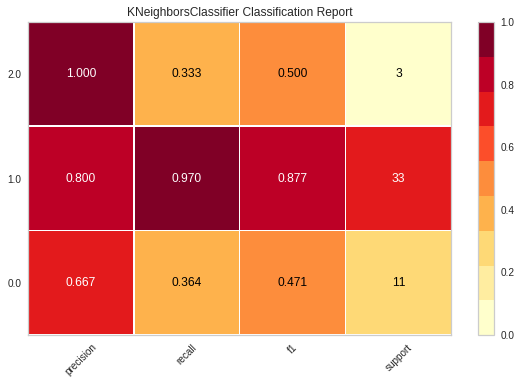

In [ ]:
#Classification Report
plot_model(knn, "class_report")

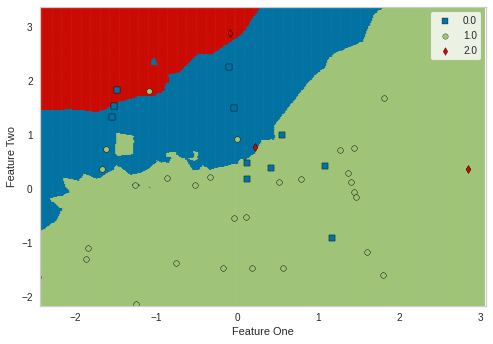

In [ ]:
#Decision Boundary
plot_model(knn, "boundary")

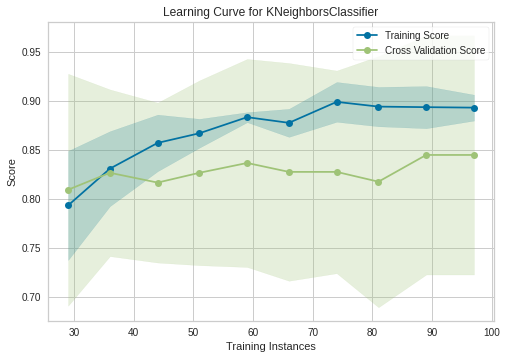

In [ ]:
#Learning Curve
plot_model(knn, "learning")

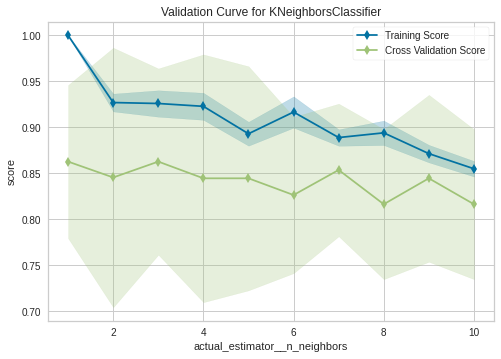

In [ ]:
#Validation Curve
plot_model(knn, "vc")

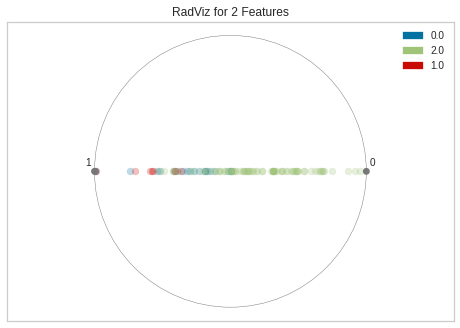

In [ ]:
#Dimension Learning
plot_model(knn, "dimension")

In [ ]:
#Model Hyperparameter
plot_model(knn, "parameter")

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


Logistic Regression:

In [ ]:
#Logistic Regression Model
lr = create_model("lr", fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.9403,0.7792,0.8485,0.8182,0.5810,0.5923
1,0.8636,0.9798,0.8125,0.8538,0.8560,0.6633,0.6682
2,0.8182,0.9293,0.5000,0.7374,0.7754,0.5111,0.5316
3,0.7143,0.8824,0.6250,0.6825,0.6905,0.2759,0.2824
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.8429,0.9463,0.7433,0.8244,0.8280,0.6062,0.6149
SD,0.0926,0.0410,0.1704,0.1095,0.1021,0.2354,0.2320


In [ ]:
#Tune Logistic Regression Model
tuned_lr = tune_model(lr, n_iter = 50)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:07:44
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
evaluate_model(lr)